In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Load datasets with enhanced encoding handling
def load_season_data(regular_file, playoffs_file, season_name):
    encodings = ["utf-8-sig", "ISO-8859-1", "cp1252"]
    
    for encoding in encodings:
        try:
            reg_df = pd.read_csv(regular_file, encoding=encoding, delimiter=';')
            break
        except UnicodeDecodeError:
            continue
    reg_df["Season"] = season_name
    reg_df["Season Type"] = "Regular"
    
    for encoding in encodings:
        try:
            po_df = pd.read_csv(playoffs_file, encoding=encoding, delimiter=';')
            break
        except UnicodeDecodeError:
            continue
    po_df["Season"] = season_name
    po_df["Season Type"] = "Playoffs"
    
    return pd.concat([reg_df, po_df], ignore_index=True)

# Load all seasons
df_2021 = load_season_data("2021-2022 NBA Player Stats - Regular.csv", "2021-2022 NBA Player Stats - Playoffs.csv", "2021-2022")
df_2022 = load_season_data("2022-2023 NBA Player Stats - Regular.csv", "2022-2023 NBA Player Stats - Playoffs.csv", "2022-2023")
df_2023 = load_season_data("2023-2024 NBA Player Stats - Regular.csv", "2023-2024 NBA Player Stats - Playoffs.csv", "2023-2024")

# Combine all data
df = pd.concat([df_2021, df_2022, df_2023], ignore_index=True)

In [5]:
# Load selected columns from player data
selected_columns = ["player_name", "player_height", "player_weight", "college", "country", "draft_year", "draft_round", "draft_number"]
player_data = pd.read_csv("all_seasons.csv", encoding="utf-8-sig", usecols=selected_columns)

# Drop duplicate player records and keep the latest entry
player_data = player_data.drop_duplicates(subset=["player_name"], keep="last")

# Merge selected player data with main dataset
df = df.merge(player_data, left_on="Player", right_on="player_name", how="left").drop('player_name',axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2874 entries, 0 to 2873
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rk             2874 non-null   int64  
 1   Player         2874 non-null   object 
 2   Pos            2874 non-null   object 
 3   Age            2874 non-null   int64  
 4   Tm             2874 non-null   object 
 5   G              2874 non-null   int64  
 6   GS             2874 non-null   int64  
 7   MP             2874 non-null   float64
 8   FG             2874 non-null   float64
 9   FGA            2874 non-null   float64
 10  FG%            2874 non-null   float64
 11  3P             2874 non-null   float64
 12  3PA            2874 non-null   float64
 13  3P%            2874 non-null   float64
 14  2P             2874 non-null   float64
 15  2PA            2874 non-null   float64
 16  2P%            2874 non-null   float64
 17  eFG%           2874 non-null   float64
 18  FT      

In [9]:
# Check for missing values
df.isnull().sum()

# Fill missing values with 0
#df.fillna(0, inplace=True)

Rk                 0
Player             0
Pos                0
Age                0
Tm                 0
G                  0
GS                 0
MP                 0
FG                 0
FGA                0
FG%                0
3P                 0
3PA                0
3P%                0
2P                 0
2PA                0
2P%                0
eFG%               0
FT                 0
FTA                0
FT%                0
ORB                0
DRB                0
TRB                0
AST                0
STL                0
BLK                0
TOV                0
PF                 0
PTS                0
Season             0
Season Type        0
player_height    270
player_weight    270
college          491
country          270
draft_year       270
draft_round      270
draft_number     270
dtype: int64

In [13]:
df['college'] = df['college'].fillna('no data')

In [15]:
df.isnull().sum()

Rk                 0
Player             0
Pos                0
Age                0
Tm                 0
G                  0
GS                 0
MP                 0
FG                 0
FGA                0
FG%                0
3P                 0
3PA                0
3P%                0
2P                 0
2PA                0
2P%                0
eFG%               0
FT                 0
FTA                0
FT%                0
ORB                0
DRB                0
TRB                0
AST                0
STL                0
BLK                0
TOV                0
PF                 0
PTS                0
Season             0
Season Type        0
player_height    270
player_weight    270
college            0
country          270
draft_year       270
draft_round      270
draft_number     270
dtype: int64

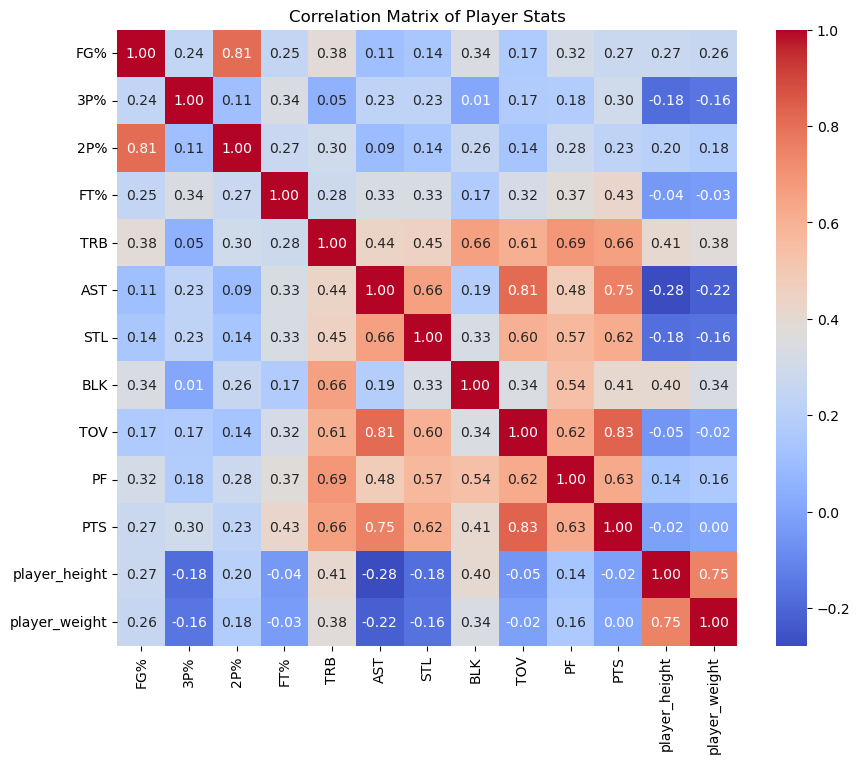

In [17]:
#Correlation Matrix
features = ['FG%',
        '3P%',  '2P%',  'FT%',
        'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
         'player_height', 'player_weight']
plt.figure(figsize=(10,8))
sns.heatmap(df[features].dropna().corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Player Stats")
plt.show()

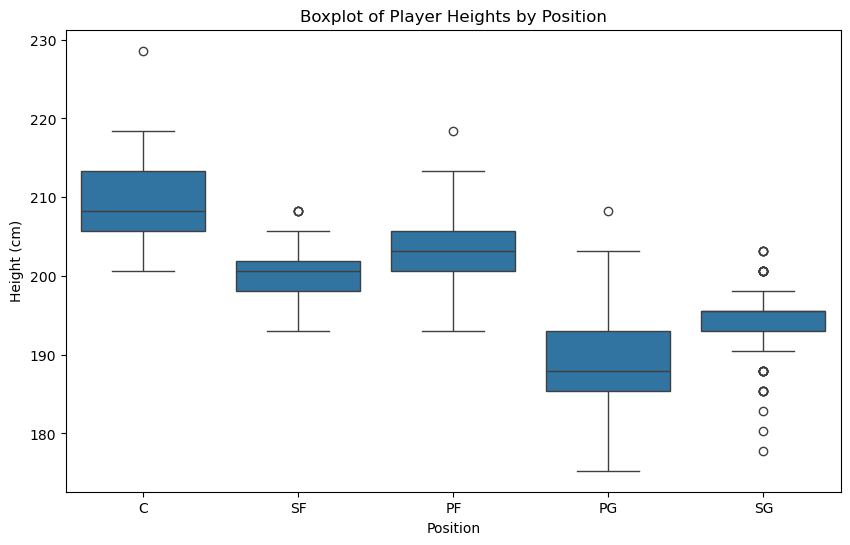

In [93]:
# Boxplot of Player Heights by Position
plt.figure(figsize=(10, 6))
sns.boxplot(x="Pos", y="player_height", data=df.drop_duplicates(keep = 'last',subset = ['Player']).dropna(subset=["player_height"]))
plt.title("Boxplot of Player Heights by Position")
plt.xlabel("Position")
plt.ylabel("Height (cm)")
plt.show()

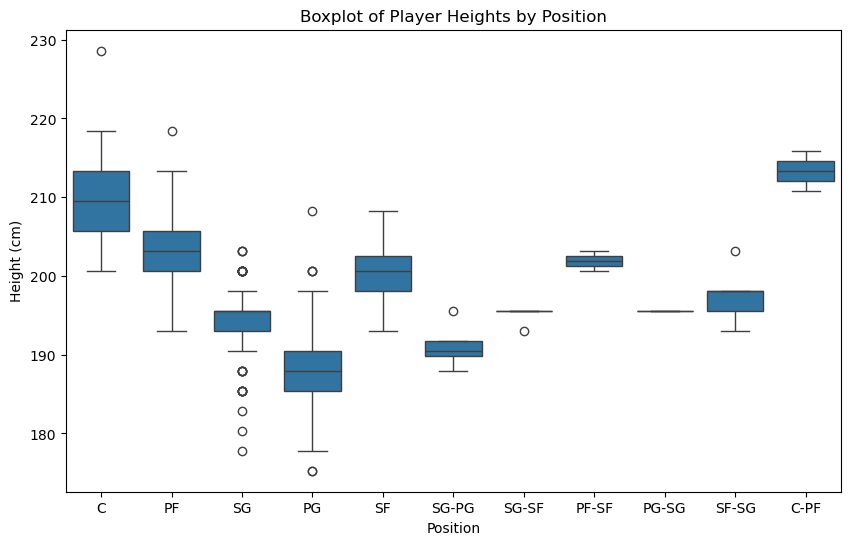

In [91]:
# Boxplot of Player Heights by Position
plt.figure(figsize=(10, 6))
sns.boxplot(x="Pos", y="player_height", data=df.drop_duplicates(keep = 'first',subset = ['Player']).dropna(subset=["player_height"]))
plt.title("Boxplot of Player Heights by Position")
plt.xlabel("Position")
plt.ylabel("Height (cm)")
plt.show()

In [32]:
df[df['Player'].apply(lambda x : 'lebron' in x.lower())]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,PTS,Season,Season Type,player_height,player_weight,college,country,draft_year,draft_round,draft_number
368,274,LeBron James,SF,37,LAL,56,56,37.2,11.4,21.8,...,30.3,2021-2022,Regular,205.74,113.398,no data,USA,2003,1,1
1335,239,LeBron James,PF,38,LAL,55,54,35.5,11.1,22.2,...,28.9,2022-2023,Regular,205.74,113.398,no data,USA,2003,1,1
1803,96,LeBron James,PF,38,LAL,16,16,38.7,9.2,18.4,...,24.5,2022-2023,Playoffs,205.74,113.398,no data,USA,2003,1,1
2250,250,LeBron James,PF,39,LAL,71,71,35.3,9.6,17.9,...,25.7,2023-2024,Regular,205.74,113.398,no data,USA,2003,1,1
2752,93,LeBron James,PF,39,LAL,5,5,40.8,11.2,19.8,...,27.8,2023-2024,Playoffs,205.74,113.398,no data,USA,2003,1,1


In [34]:
df['Pos'].unique()

array(['C', 'PF', 'SG', 'PG', 'SF', 'SG-PG', 'SG-SF', 'PF-SF', 'PG-SG',
       'SF-SG', 'C-PF', 'PF-C', 'SF-PF'], dtype=object)

Number of NBA players from each country:
country
USA                  2139
Canada                 44
France                 37
Australia              22
Serbia                 15
                     ... 
Macedonia               1
Bosnia                  1
Great Britain           1
US Virgin Islands       1
Austria                 1
Name: count, Length: 80, dtype: int64


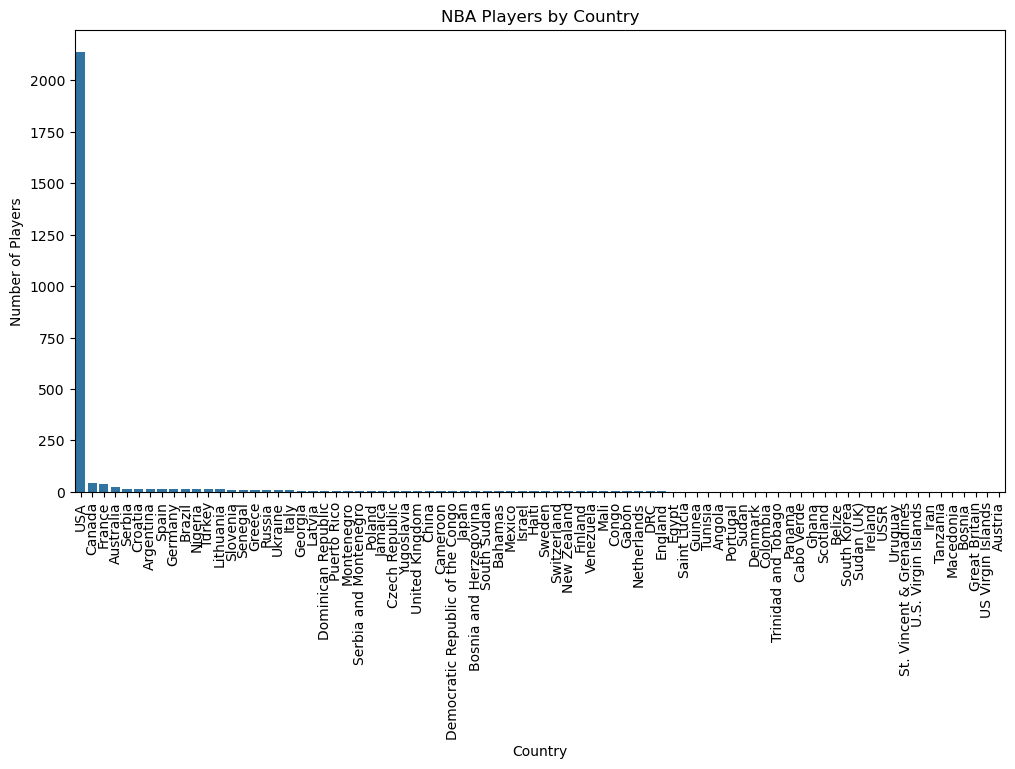

In [44]:
# Show the number of NBA players from each country
country_counts = player_data["country"].value_counts()
print("Number of NBA players from each country:")
print(country_counts)

# Plot the distribution of players by country
plt.figure(figsize=(12,6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Number of Players")
plt.title("NBA Players by Country")
plt.show()

In [50]:
country_counts.index

Index(['USA', 'Canada', 'France', 'Australia', 'Serbia', 'Croatia',
       'Argentina', 'Spain', 'Germany', 'Brazil', 'Nigeria', 'Turkey',
       'Lithuania', 'Slovenia', 'Senegal', 'Greece', 'Russia', 'Ukraine',
       'Italy', 'Georgia', 'Latvia', 'Dominican Republic', 'Puerto Rico',
       'Montenegro', 'Serbia and Montenegro', 'Poland', 'Jamaica',
       'Czech Republic', 'Yugoslavia', 'United Kingdom', 'China', 'Cameroon',
       'Democratic Republic of the Congo', 'Japan', 'Bosnia and Herzegovina',
       'South Sudan', 'Bahamas', 'Mexico', 'Israel', 'Haiti', 'Sweden',
       'Switzerland', 'New Zealand', 'Finland', 'Venezuela', 'Mali', 'Congo',
       'Gabon', 'Netherlands', 'DRC', 'England', 'Egypt', 'Saint Lucia',
       'Guinea', 'Tunisia', 'Angola', 'Portugal', 'Sudan', 'Denmark',
       'Colombia', 'Trinidad and Tobago', 'Panama', 'Cabo Verde', 'Ghana',
       'Scotland', 'Belize', 'South Korea', 'Sudan (UK)', 'Ireland', 'USSR',
       'Uruguay', 'St. Vincent & Grenadines',

Number of NBA players from each continent:
continent
USA              2139
Europe            211
Africa             47
North America      47
Other              43
South America      31
Oceania            24
Asia                9
Name: count, dtype: int64


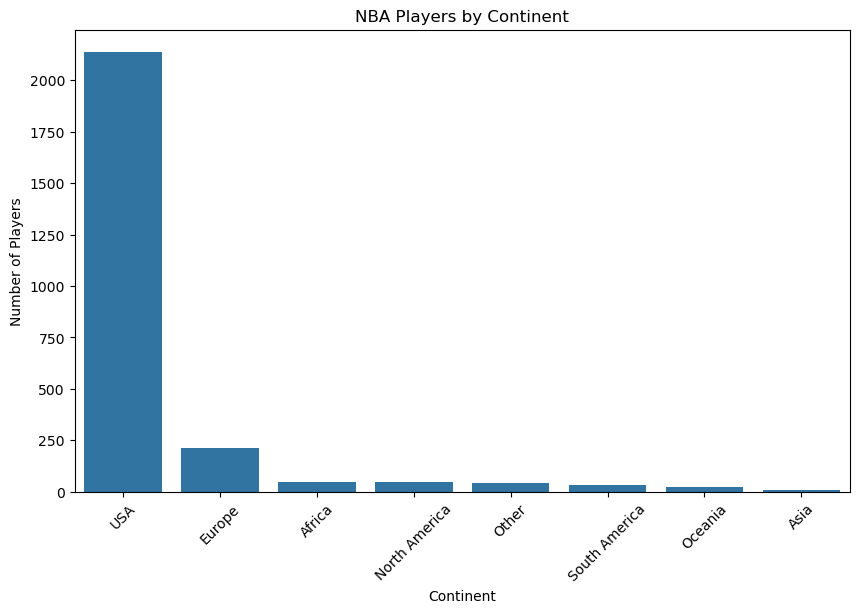

In [48]:
# Mapping countries to continents
continent_map = {
    "USA": "USA",
    "Canada": "North America", "Mexico": "North America",
    "France": "Europe", "Germany": "Europe", "Spain": "Europe", "Italy": "Europe", "Lithuania": "Europe", "Russia": "Europe", "Ukraine": "Europe", "Greece": "Europe", "Turkey": "Europe", "Latvia": "Europe", "Poland": "Europe", "United Kingdom": "Europe", "Sweden": "Europe", "Switzerland": "Europe", "Finland": "Europe", "Denmark": "Europe", "Netherlands": "Europe", "Portugal": "Europe", "Ireland": "Europe", "Austria": "Europe", "Czech Republic": "Europe", "Macedonia": "Europe", "Great Britain": "Europe", "Serbia": "Europe", "Croatia": "Europe", "Slovenia": "Europe", "Montenegro": "Europe", "Bosnia and Herzegovina": "Europe", "Serbia and Montenegro": "Europe", "Yugoslavia": "Europe", "Bosnia": "Europe",
    "Brazil": "South America", "Argentina": "South America", "Venezuela": "South America", "Colombia": "South America", "Uruguay": "South America",
    "Australia": "Oceania", "New Zealand": "Oceania",
    "Nigeria": "Africa", "Senegal": "Africa", "South Sudan": "Africa", "Sudan": "Africa", "Democratic Republic of the Congo": "Africa", "Congo": "Africa", "DRC": "Africa", "Gabon": "Africa", "Angola": "Africa", "Mali": "Africa", "Tunisia": "Africa", "Egypt": "Africa", "Ghana": "Africa", "Guinea": "Africa", "Cameroon": "Africa", "Cape Verde": "Africa", "Sudan (UK)": "Africa",
    "China": "Asia", "Japan": "Asia", "South Korea": "Asia", "Iran": "Asia", "Philippines": "Asia",
}

# Assigning continents
player_data["continent"] = player_data["country"].map(continent_map).fillna("Other")
continent_counts = player_data["continent"].value_counts()

# Print the number of players from each continent
print("Number of NBA players from each continent:")
print(continent_counts)

# Plot the distribution of players by continent
plt.figure(figsize=(10,6))
sns.barplot(x=continent_counts.index, y=continent_counts.values)
plt.xlabel("Continent")
plt.ylabel("Number of Players")
plt.title("NBA Players by Continent")
plt.xticks(rotation=45)
plt.show()

Top 10 Defensive Players:
              Player  Defense Score
0  Victor Wembanyama       0.905724
1     Andre Drummond       0.818386
2     Walker Kessler       0.756055
3        Greg Monroe       0.714286
4      Anthony Davis       0.713831
5       Jusuf Nurki?       0.690518
6       Clint Capela       0.689951
7       Steven Adams       0.689836
8        Rudy Gobert       0.666412
9  Jonas Valan?i?nas       0.665621


C:\Users\KSN\AppData\Local\Temp\ipykernel_13588\621779740.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_defensive_players["Defense Score"], y=top_defensive_players["Player"], palette="coolwarm")


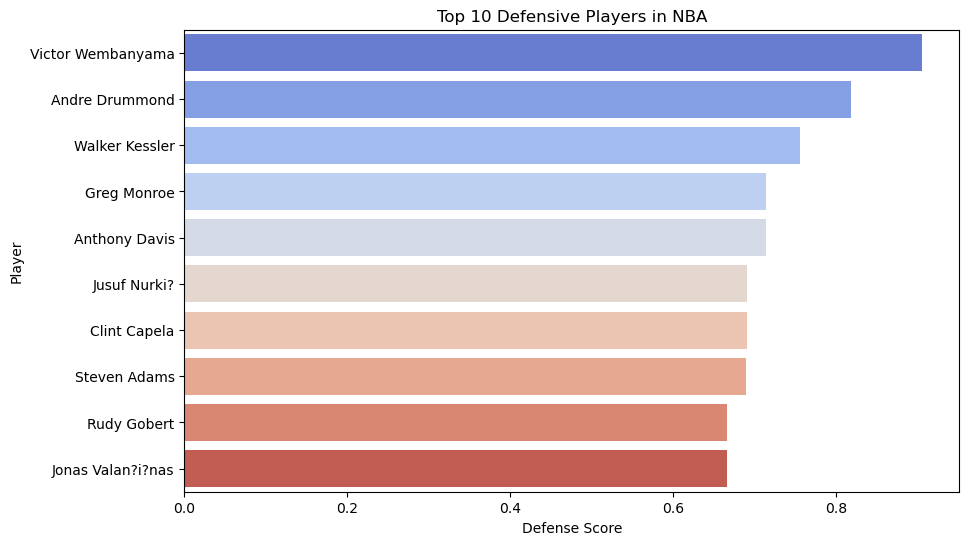

In [68]:
# Identifying Top 10 Defensive Players
# Using metrics: Steals (STL), Blocks (BLK), Defensive Rebounds (DRB), and Offensive Rebounds (ORB)
df["Defense Score"] = (
    (df["STL"] * 2.5 / df["MP"]) + 
    (df["BLK"] * 2.5 / df["MP"]) + 
    (df["DRB"] * 1.5 / df["MP"]) + 
    (df["ORB"] * 1 / df["MP"]))

top_defensive_players = df[df['MP']>=20].groupby("Player")["Defense Score"].mean().nlargest(10).reset_index()

print("Top 10 Defensive Players:")
print(top_defensive_players)

# Plot Top 10 Defensive Players
plt.figure(figsize=(10,6))
sns.barplot(x=top_defensive_players["Defense Score"], y=top_defensive_players["Player"], palette="coolwarm")
plt.xlabel("Defense Score")
plt.ylabel("Player")
plt.title("Top 10 Defensive Players in NBA")
plt.show()

Top 10 Offensive Players:
                    Player  Offense Score
0             Nikola Joki?       4.392589
1            Stephen Curry       4.321993
2              Luka Don?i?       4.264429
3  Shai Gilgeous-Alexander       4.229452
4           Damian Lillard       4.202373
5             Devin Booker       4.185785
6       Kenneth Lofton Jr.       4.155389
7             Kevin Durant       4.140439
8             LeBron James       4.114070
9             Kyrie Irving       4.058050


C:\Users\KSN\AppData\Local\Temp\ipykernel_13588\3463132051.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_offensive_players["Offense Score"], y=top_offensive_players["Player"], palette="magma")


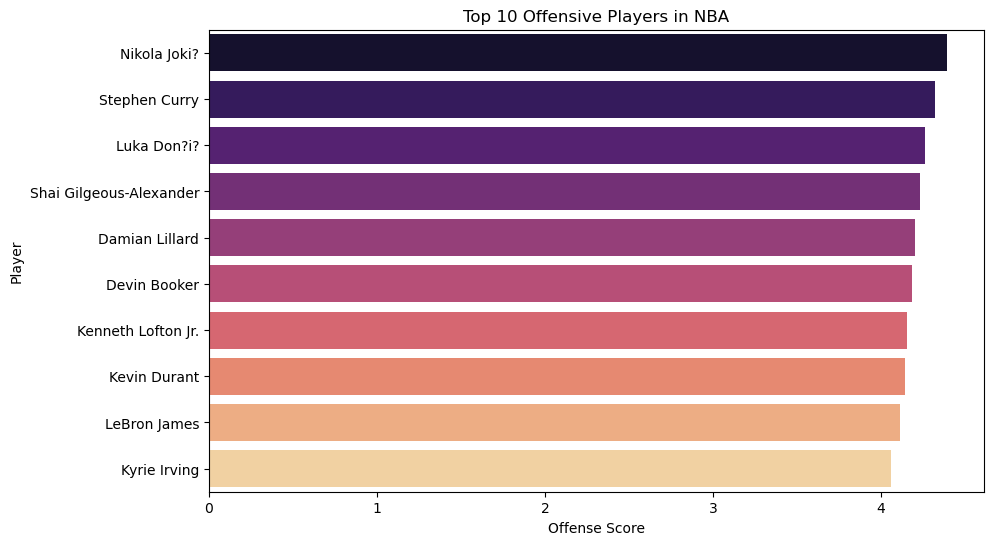

In [72]:
# Identifying Top 10 Offensive Players using 3P%, 2P%, FT%, AST, PTS, TOV, MP
# Adjusted formula to normalize by MP
df["Offense Score"] = (df["3P%"] * 1.5) + (df["2P%"] * 1.5) + (df["FT%"] * 1.2) + ((df["AST"] * 2) / df["MP"]) + ((df["PTS"] * 2) / df["MP"]) - ((df["TOV"] * 1) / df["MP"])
top_offensive_players = df[df['MP']>=20].groupby("Player")["Offense Score"].mean().nlargest(10).reset_index()

print("Top 10 Offensive Players:")
print(top_offensive_players)

# Plot Top 10 Offensive Players
plt.figure(figsize=(10,6))
sns.barplot(x=top_offensive_players["Offense Score"], y=top_offensive_players["Player"], palette="magma")
plt.xlabel("Offense Score")
plt.ylabel("Player")
plt.title("Top 10 Offensive Players in NBA")
plt.show()

Top 10 Offensive Players (Age ≤ 26):
             Player  Offense Score
0       Ahmad Caver       5.500000
1      Bones Hyland       5.425000
2      Jared Harper       5.115581
3        Luka Garza       4.522684
4      Tyler Dorsey       4.472222
5       Darius Days       4.451587
6      Malik Newman       4.450000
7  Jarrell Brantley       4.300694
8   Sekou Doumbouya       4.275500
9        Kevin Knox       4.238467


C:\Users\KSN\AppData\Local\Temp\ipykernel_13588\2334917907.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_offensive_players["Offense Score"], y=top_offensive_players["Player"], palette="magma")


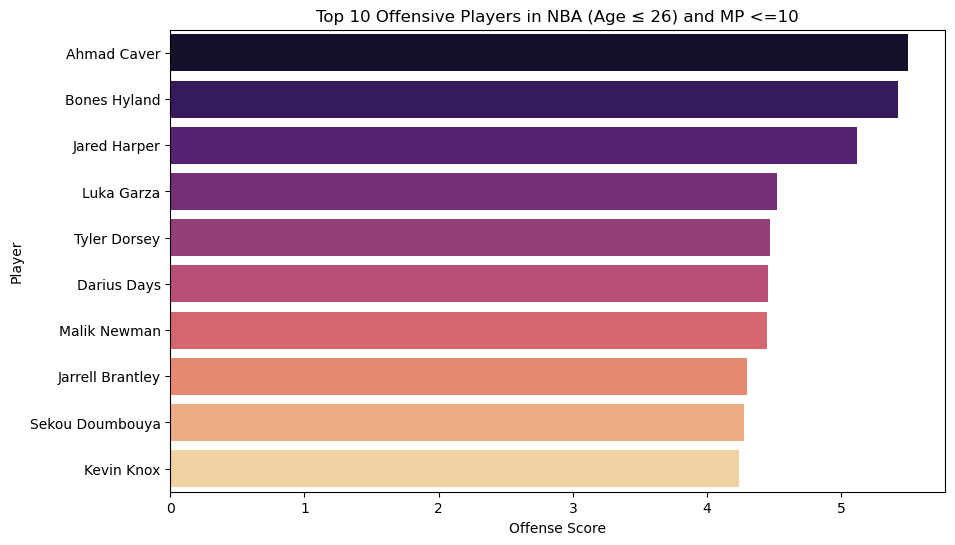

In [87]:
# Identifying Top 10 Offensive Players using updated formula (Age ≤ 26)
df_filtered = df[ (df["Age"] <= 26) & (df["MP"] <= 10)]  # Filter out players with very low minutes played and age > 26

# Select Top 10 offensive players
top_offensive_players = df_filtered.groupby("Player")["Offense Score"].mean().nlargest(10).reset_index()

print("Top 10 Offensive Players (Age ≤ 26):")
print(top_offensive_players)

# Plot Top 10 Offensive Players
plt.figure(figsize=(10,6))
sns.barplot(x=top_offensive_players["Offense Score"], y=top_offensive_players["Player"], palette="magma")
plt.xlabel("Offense Score")
plt.ylabel("Player")
plt.title("Top 10 Offensive Players in NBA (Age ≤ 26) and MP <=10")
plt.show()

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2874 entries, 0 to 2873
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rk             2874 non-null   int64  
 1   Player         2874 non-null   object 
 2   Pos            2874 non-null   object 
 3   Age            2874 non-null   int64  
 4   Tm             2874 non-null   object 
 5   G              2874 non-null   int64  
 6   GS             2874 non-null   int64  
 7   MP             2874 non-null   float64
 8   FG             2874 non-null   float64
 9   FGA            2874 non-null   float64
 10  FG%            2874 non-null   float64
 11  3P             2874 non-null   float64
 12  3PA            2874 non-null   float64
 13  3P%            2874 non-null   float64
 14  2P             2874 non-null   float64
 15  2PA            2874 non-null   float64
 16  2P%            2874 non-null   float64
 17  eFG%           2874 non-null   float64
 18  FT      

In [95]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Season',
       'Season Type', 'player_height', 'player_weight', 'college', 'country',
       'draft_year', 'draft_round', 'draft_number', 'Defense Score',
       'Offense Score'],
      dtype='object')

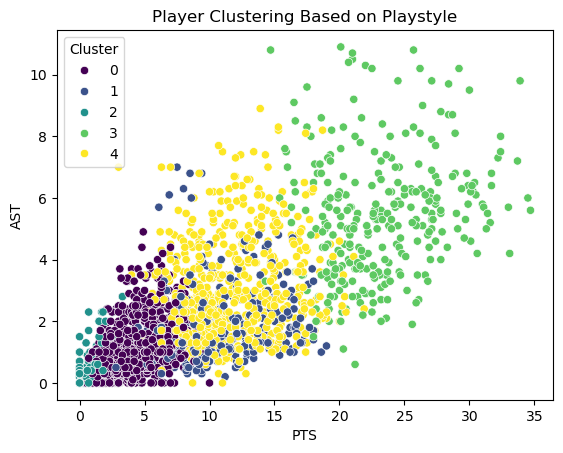

In [97]:
# Clustering Players Based on Playstyle
features_cluster = ['FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
df_cluster = df.dropna(subset=features_cluster)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster[features_cluster])
kmeans = KMeans(n_clusters=5, random_state=42)
df_cluster["Cluster"] = kmeans.fit_predict(df_scaled)
sns.scatterplot(x=df_cluster["PTS"], y=df_cluster["AST"], hue=df_cluster["Cluster"], palette="viridis")
plt.title("Player Clustering Based on Playstyle")
plt.show()

In [101]:
df_cluster[df_cluster['Player'].apply(lambda x : 'lebron' in x.lower())]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,player_height,player_weight,college,country,draft_year,draft_round,draft_number,Defense Score,Offense Score,Cluster
368,274,LeBron James,SF,37,LAL,56,56,37.2,11.4,21.8,...,205.74,113.398,no data,USA,2003,1,1,0.477151,4.243980,3
1335,239,LeBron James,PF,38,LAL,55,54,35.5,11.1,22.2,...,205.74,113.398,no data,USA,2003,1,1,0.439437,4.194227,3
1803,96,LeBron James,PF,38,LAL,16,16,38.7,9.2,18.4,...,205.74,113.398,no data,USA,2003,1,1,0.505168,3.791668,3
2250,250,LeBron James,PF,39,LAL,71,71,35.3,9.6,17.9,...,205.74,113.398,no data,USA,2003,1,1,0.424929,4.230195,3
2752,93,LeBron James,PF,39,LAL,5,5,40.8,11.2,19.8,...,205.74,113.398,no data,USA,2003,1,1,0.448529,4.110280,3


In [119]:
df_cluster[(df_cluster['Cluster']==3)&(df['Age']<22)&(df['Pos']<'PF')]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,player_height,player_weight,college,country,draft_year,draft_round,draft_number,Defense Score,Offense Score,Cluster
2515,455,Alperen Sengun,C,21,HOU,63,63,32.5,8.4,15.6,...,210.82,110.222856,no data,Turkey,2021,1,16,0.530769,3.653754,3
2615,537,Victor Wembanyama,C,20,SAS,71,71,29.7,7.8,16.7,...,NaN,NaN,no data,NaN,NaN,NaN,NaN,0.905724,3.822825,3


Predictions and MAE results saved successfully.


In [137]:
# Combine all data except 2023-2024 as training data
df_train = pd.concat([df_2021, df_2022], ignore_index=True)
df_test = df_2023.copy()

df_train["season_start"] = df_train['Season'].apply(lambda x : x.split('-')[0])
df_test['season_start'] = df_test['Season'].apply(lambda x : x.split('-')[0])

# Features to predict
features = ["3P%", "2P%", "FT%", "AST", "PTS", "TOV", "MP", "STL", "BLK", "DRB", "ORB"]

# Train and predict for each player
predictions = []
mae_results = []

for player in df_train["Player"].unique():
    df_player = df_train[df_train["Player"] == player]
    df_player_test = df_test[df_test["Player"] == player]
    
    if len(df_player) > 1 and not df_player_test.empty:
        for feature in features:
            X_train = df_player[["season_start"]]
            y_train = df_player[feature]
            X_test = df_player_test[["season_start"]]
            y_test = df_player_test[feature]
            
            model = LinearRegression()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            mae = mean_absolute_error(y_test, y_pred)
            mae_results.append({"Player": player, "Feature": feature, "MAE": mae})
            
            predictions.append({"Player": player, "Feature": feature, "Predicted": y_pred[0], "Actual": y_test.values[0]})

# Save predictions to CSV
predictions_df = pd.DataFrame(predictions)
predictions_df.to_csv("./nba_predictions_per_feature.csv", index=False)

# Save MAE results to CSV
mae_df = pd.DataFrame(mae_results)
mae_df.to_csv("./nba_mae_results_per_feature.csv", index=False)

print("Per-feature Linear Regression predictions and MAE results saved successfully.")


Per-feature Linear Regression predictions and MAE results saved successfully.


In [140]:
predictions_df.head()

,Player,Feature,Predicted,Actual
0,Precious Achiuwa,3P%,0.2020,0.268
1,Precious Achiuwa,2P%,0.6160,0.562
2,Precious Achiuwa,FT%,0.8065,0.616
3,Precious Achiuwa,AST,0.7500,1.300
4,Precious Achiuwa,PTS,8.7500,7.600
